In [4]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [6]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete4TRK9X/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [7]:
SIZE = (224, 224)

def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, SIZE)
  img /= 255.0
  return img, label

In [8]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [9]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE[0], SIZE[1], 3), include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [13]:
model = tf.keras.Sequential((
    base_layers,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1)
))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 3652s 3s/step - loss: 0.1656 - accuracy: 0.9307


In [ ]:
files.upload()

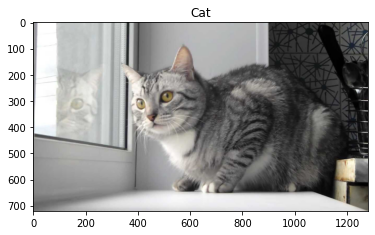

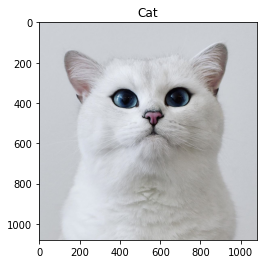

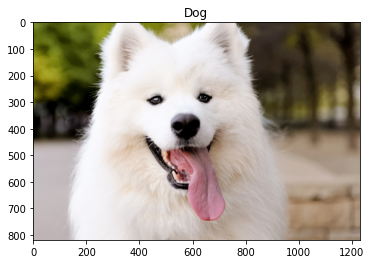

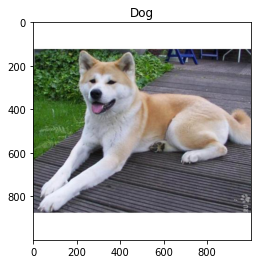

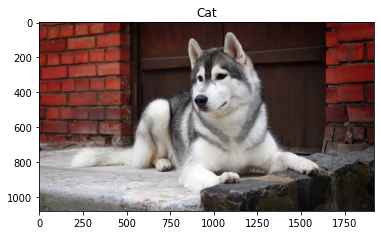

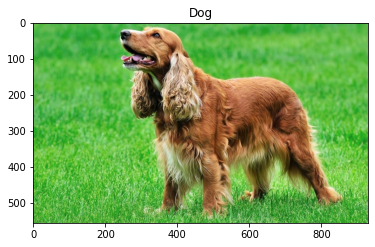

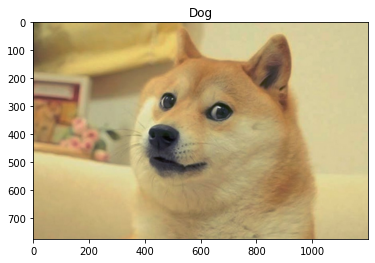

In [31]:
images = ['1.jfif', '2.jfif', '3.jfif', '4.jfif', '5.jfif', '6.jfif', '7.jfif']

for i in images:
  img = load_img(i)
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)
  plt.figure()
  plt.imshow(img)
  label = 'Dog' if prediction > 0 else 'Cat'
  plt.title('{}'.format(label))